# Plan ( Segmenting the shopping customers )
*   Understand the target customer for the marketing team to plan a strategy
*   Identify the most important shopping groups based on income age and the mall shopping score .
*   Ideal no of groups with a label for each

We will divide the mall target market into approachable groups .
Creating subsets of markey based on demographics behaviourial criteria to better understand the taarget for the marketing activities .

# The Approch of our Model

1.   We will perform quick EDA ( Exploratory Data Analysis )
2.   We will use KMEANS Clustering Algorithmn to create our segments .
3.   We will use Summary statistics on the Clusters .
4.   Finally , we will visualize the model .










In [ ]:
import pandas as pd
import seaborn as sns  #visualization library
import matplotlib.pyplot as plt #visualization library
from sklearn.cluster import KMeans #clustering
import warnings
warnings.filterwarnings('ignore')# Warnings cause some packages are not uptodate .To get rid of that


In [ ]:
# Importing DataSet
df = pd.read_csv("/content/Customer_DataTrf.csv")

In [ ]:
df.head(5) # we will see the first 5 of the dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


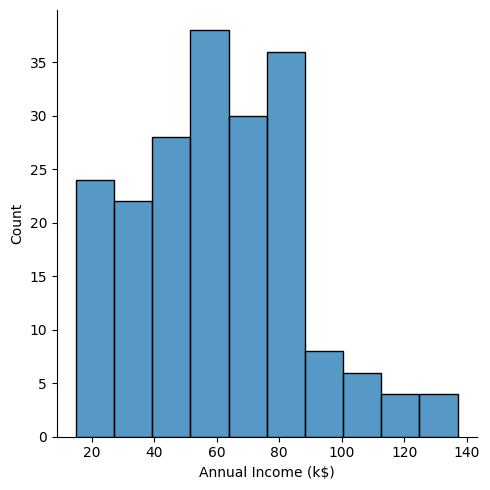

In [ ]:
# Creating a histogram to see the annual income using seaborn library
sns.displot(df['Annual Income (k$)'])

In [ ]:
df.columns # to check the columns of the dataset

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

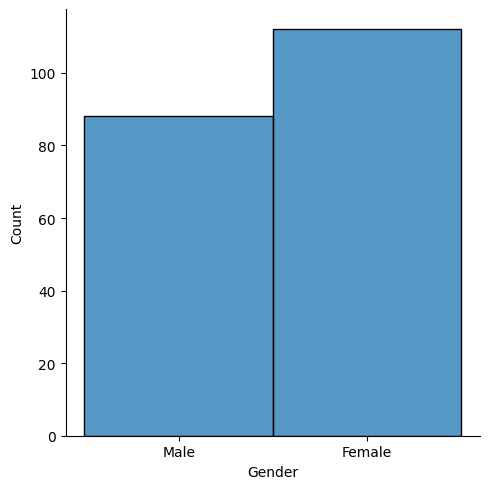

<Figure size 640x480 with 0 Axes>

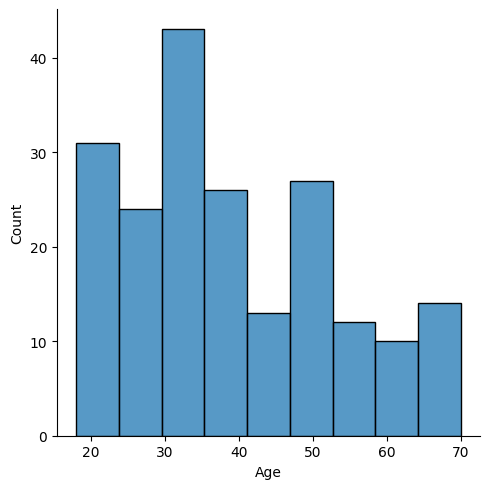

<Figure size 640x480 with 0 Axes>

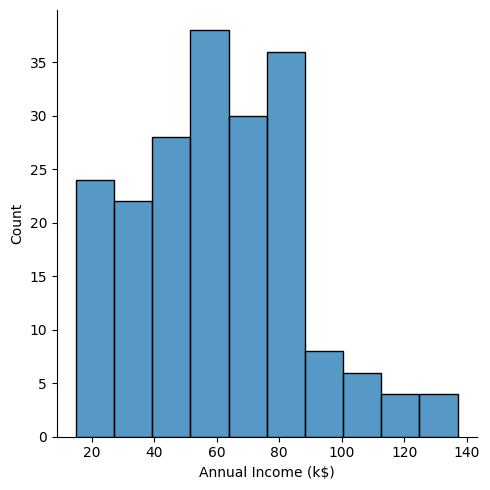

<Figure size 640x480 with 0 Axes>

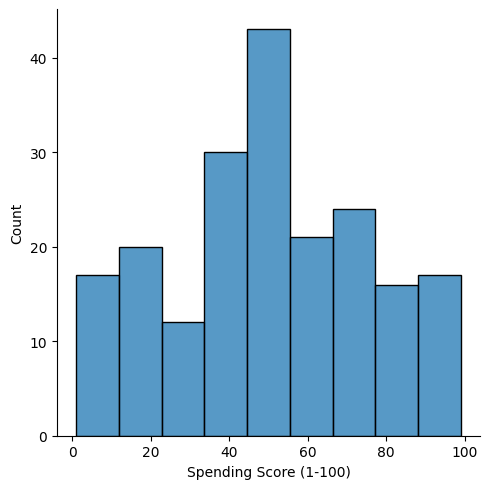

In [ ]:
columns =['Gender', 'Age', 'Annual Income (k$)','Spending Score (1-100)']  # we will cycle through the list of columns and see the histogram visualization
for i in columns:
   plt.figure()
   sns.displot(df[i])

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

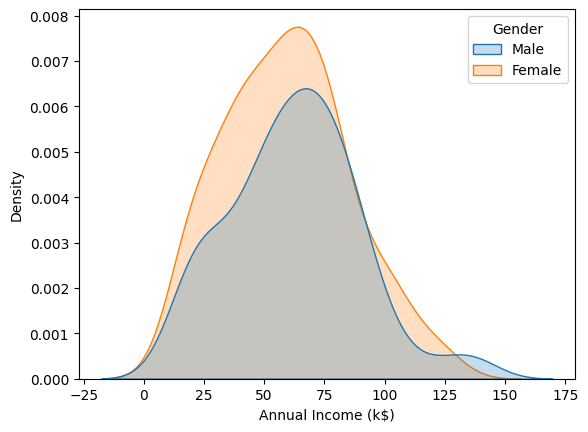

In [ ]:
sns.kdeplot(data=df, x="Annual Income (k$)", hue="Gender", fill=True) #hue will allow to break the it into dimensions . Like distribution of male and female with respect to the annual income

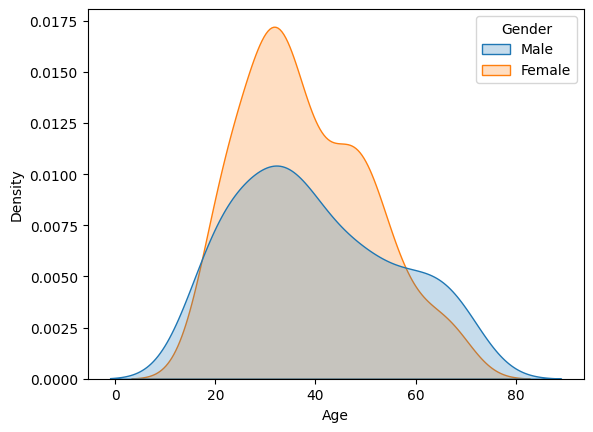

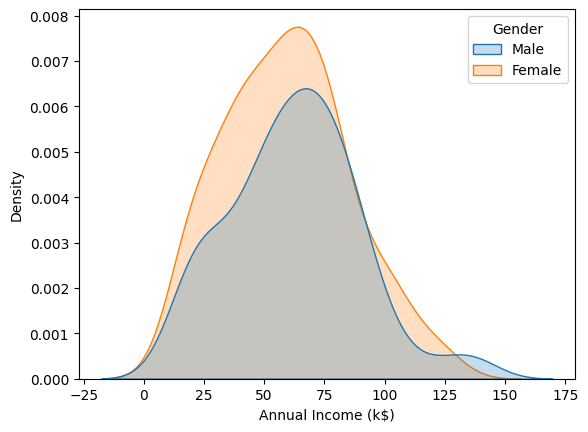

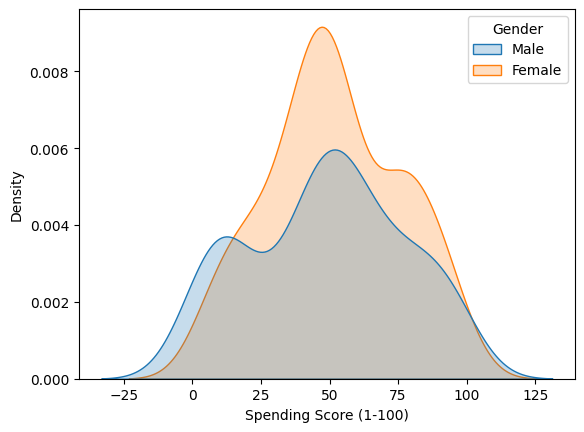

In [ ]:
columns =['Gender', 'Age', 'Annual Income (k$)','Spending Score (1-100)']  # we will cycle through the list of columns and see the histogram visualization
for i in columns:
   if i != 'Gender':  # Skip the categorical variable
      plt.figure()
      sns.kdeplot(data=df, x=df[i], hue="Gender", fill=True)

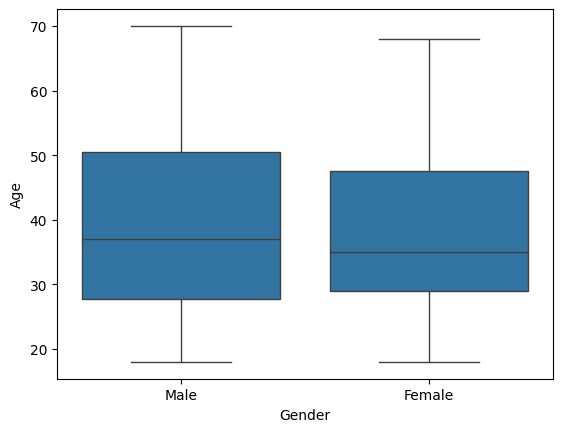

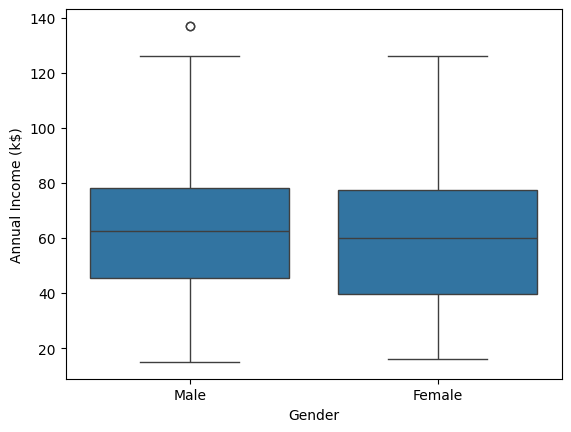

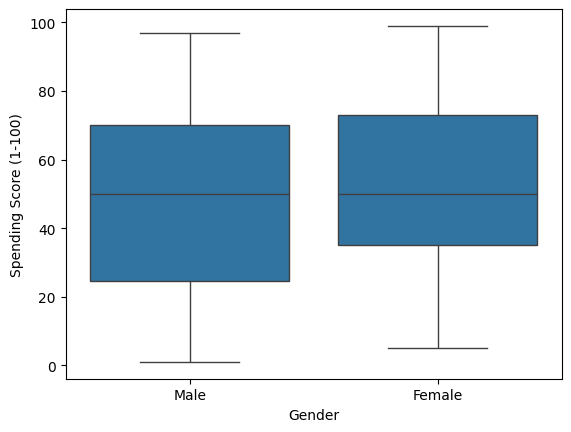

In [ ]:
columns =['Age', 'Annual Income (k$)','Spending Score (1-100)']  # we will cycle through the list of columns and see the boxplot visualization
for i in columns:
   plt.figure()
   sns.boxplot(data=df ,x='Gender',y=df[i])

In [ ]:
df['Gender'].value_counts(normalize=True)  # we can see the number of male and female and we can get the percentage (Normalize=true for rounding of the 0. so that we can know the percentage)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

# Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

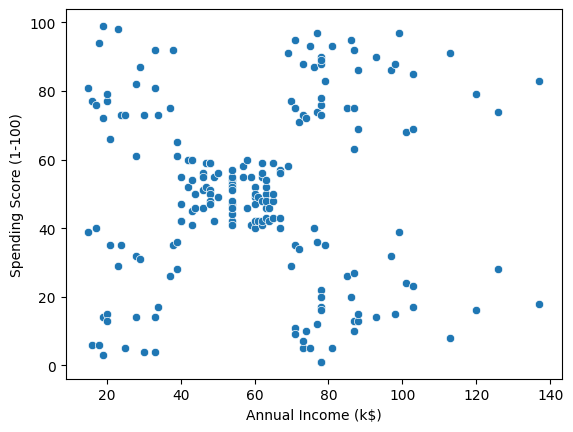

In [ ]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)') # bivariate clustering - The clustering between the two variables Annual Income and Spending Score
# We can already see 6 clusters in them

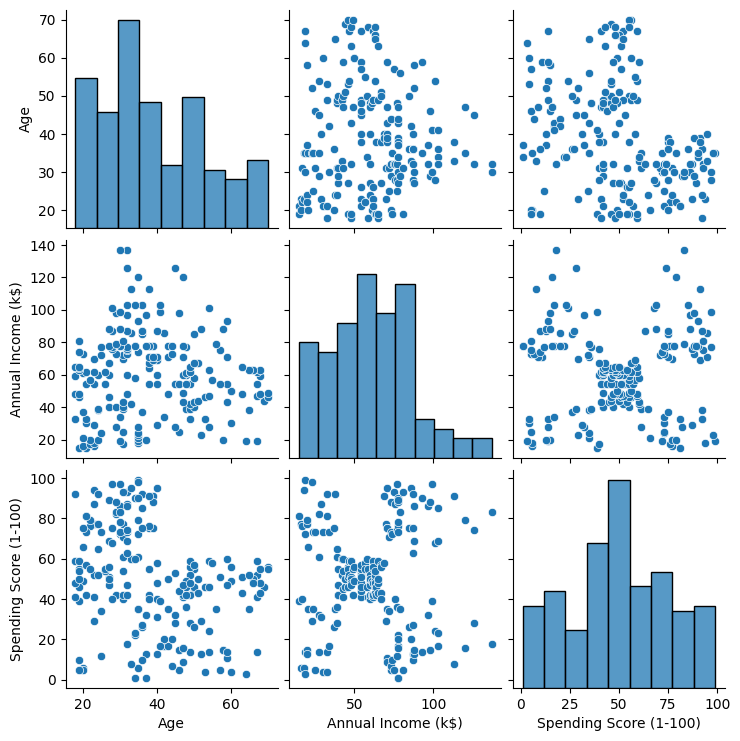

In [ ]:
# Pairplot is going to give us all the scatters and some of the histograms together
df=df.drop('CustomerID',axis=1) # Dropping off the Customer Id cause it wont add any value to the data . axis=1 is column
sns.pairplot(df)

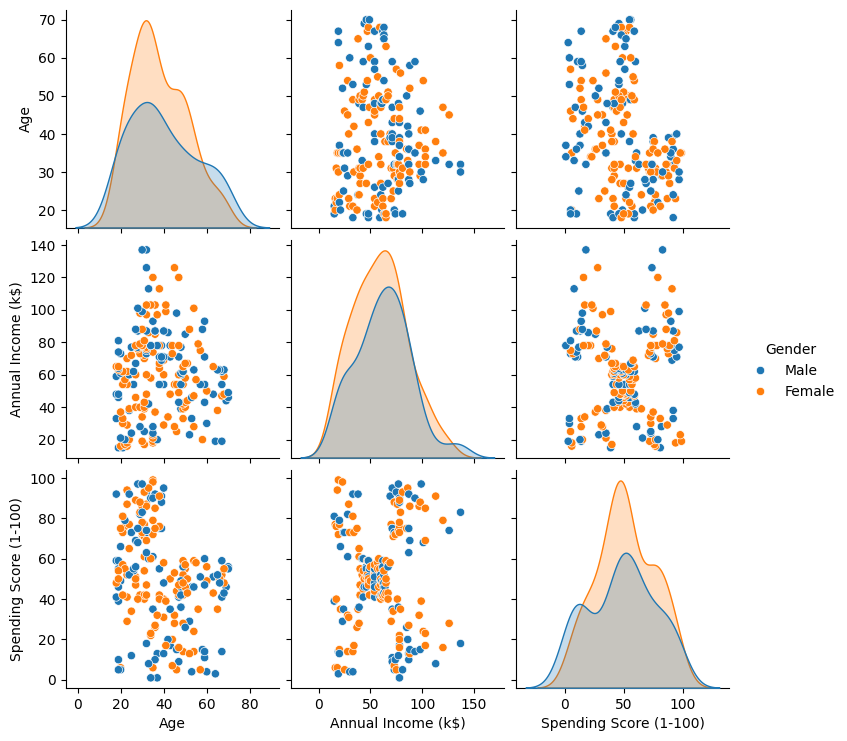

In [ ]:
sns.pairplot(df,hue='Gender')

In [ ]:
# Visualizing the mean value based on gender
df.groupby(['Gender'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [ ]:
#datatypes
df.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [ ]:
# finding the correlation
ns=(df.drop('Gender',axis=1))
ns.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

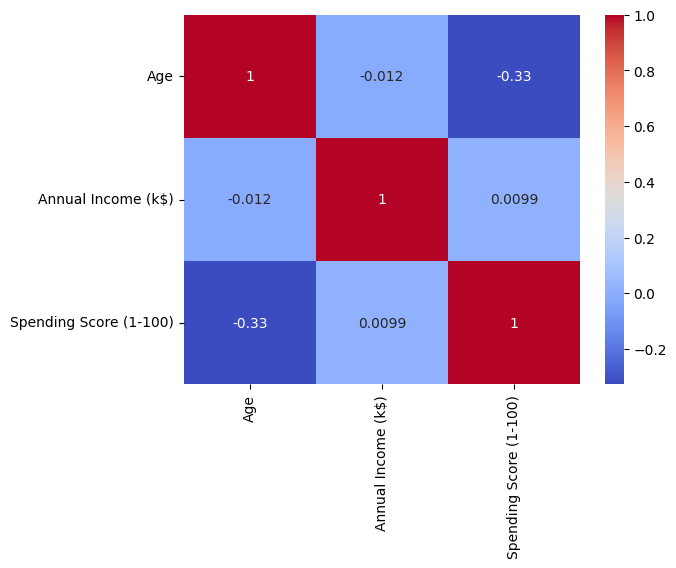

In [ ]:
# Creating a seaborn heatmap and passing the correlation as a parameter , annotations as True , cmap as coolwarm
sns.heatmap(ns.corr(),annot=True ,cmap='coolwarm')
# we can see the correlation and it is a good way to do the EDA and get an idea of what kind of data we are dealing with

32:35

# Clustering : Univariate , Bivariate and Multivariate

In [ ]:
# Clustering 1 : KMeans Algorithmn

clustering1 = KMeans(n_clusters=6) # Choosing 6 clusters


In [ ]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=6)

In [ ]:
clustering1.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4,
       4, 4], dtype=int32)

In [ ]:
# We add these labels to our initial dataframe df
df['Income Cluster'] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,3
1,Male,21,15,81,3
2,Female,20,16,6,3
3,Female,23,16,77,3
4,Female,31,17,40,3


In [ ]:
df['Income Cluster'].value_counts()

Income Cluster
2    46
5    44
1    42
3    32
0    28
4     8
Name: count, dtype: int64

In [ ]:
""" Till now we dnt know what the idea no of clusters we should have . So we will use elbow method to know the no of clusters .
 We chose 6 clusters before by default . There is a success matrix called intertia .

"""
clustering1.inertia_ # Represents the distance between the centroids

5081.484660267268

In [ ]:
intertia_scores=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(df[['Annual Income (k$)']])
  intertia_scores.append(kmeans.inertia_)

In [ ]:
intertia_scores

[137277.28000000006,
 48660.888888888876,
 23517.33093093093,
 13278.112713472483,
 8493.2293040293,
 5050.9047619047615,
 3941.4163614163635,
 2857.441697191697,
 2269.356837606839,
 1734.1677489177496]

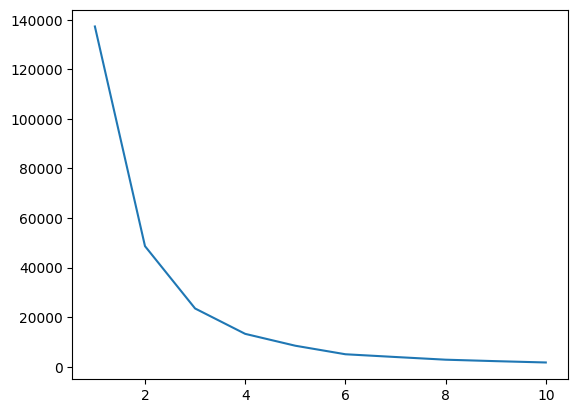

In [ ]:
plt.plot(range(1,11),intertia_scores) # Visualizing the elbow method

In [ ]:
# We can see the elbow starts at point 3 . So we can use 3 no of clusters
# changing the 6 to 3 in the previous clusters

clustering1 = KMeans(n_clusters=3) # Choosing 3 clusters
clustering1.fit(df[['Annual Income (k$)']])
clustering1.labels_
df['Income Cluster'] = clustering1.labels_


In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0


In [ ]:
df['Income Cluster'].value_counts()

Income Cluster
1    90
0    74
2    36
Name: count, dtype: int64

In [ ]:
# identifying the Columns
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster'],
      dtype='object')

In [ ]:
# Finding the mean value of all the columns ( Univariate Clustering )
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.500000,33.486486,50.229730
1,38.722222,67.088889,50.000000
2,37.833333,99.888889,50.638889


In [ ]:
# Bivariate Clustering
clustering2 = KMeans()
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']]) # fitting the data in the cluster
clustering2.labels_
df['Spending and Income Cluster']= clustering2.labels_ # adding the new cluster to the dataframe
df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,0,0
1,Male,21,15,81,0,3
2,Female,20,16,6,0,0
3,Female,23,16,77,0,3
4,Female,31,17,40,0,0


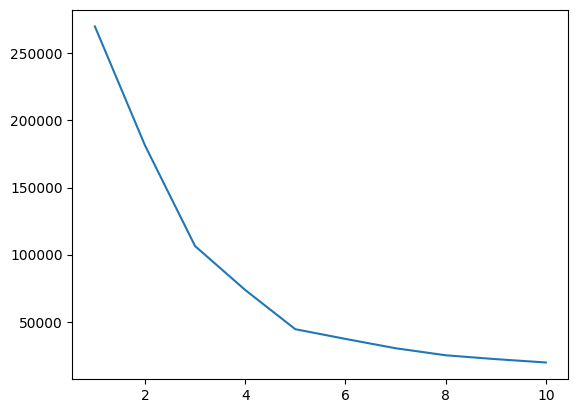

In [ ]:
intertia_scores2=[]
for i in range(1,11):
  kmeans2=KMeans(n_clusters=i)
  kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
  intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2)

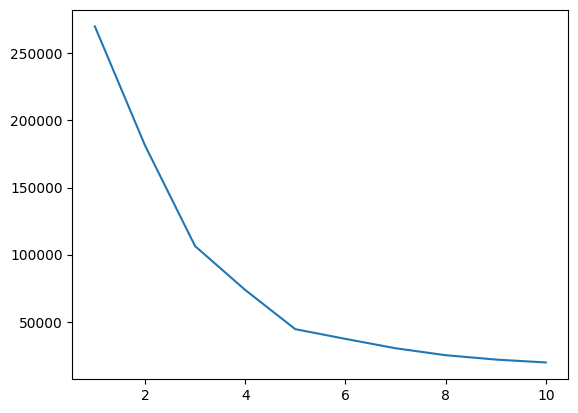

In [ ]:
# Elbow at 5 . Replacing 3 with 5
clustering1 = KMeans(n_clusters=5) # Choosing 3 clusters
clustering1.fit(df[['Annual Income (k$)']])
clustering1.labels_
df['Income Cluster'] = clustering1.labels_
df.head()

df['Income Cluster'].value_counts()
df.columns
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

# Bivariate Clustering
clustering2 = KMeans()
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']]) # fitting the data in the cluster
clustering2.labels_
df['Spending and Income Cluster']= clustering2.labels_ # adding the new cluster to the dataframe
df.head()

intertia_scores2=[]
for i in range(1,11):
  kmeans2=KMeans(n_clusters=i)
  kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
  intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2)

In [ ]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

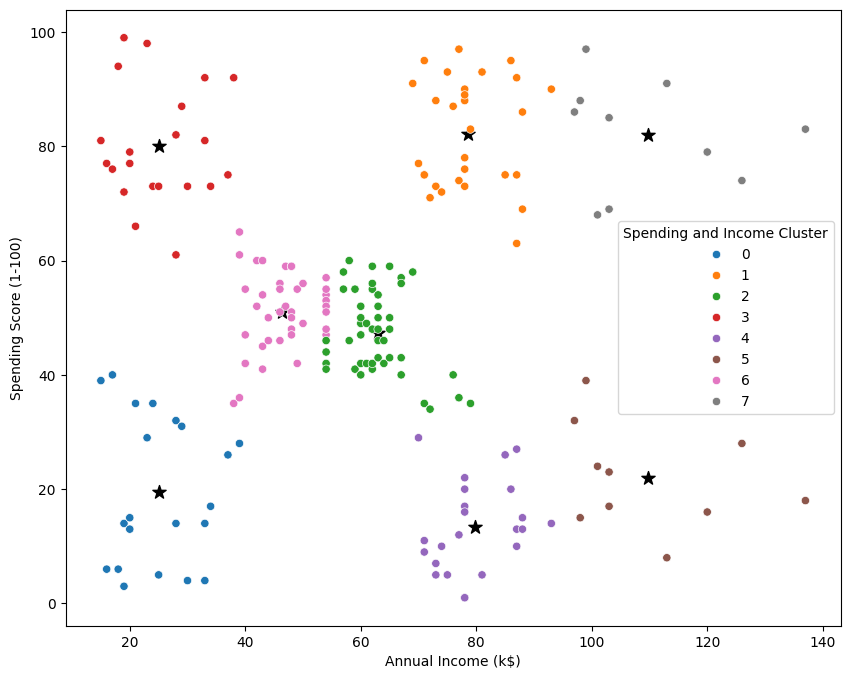

In [ ]:
plt.figure(figsize=(10,8)) # making the size of chart bigger
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')  # marking the centroids
sns.scatterplot(data=df, x='Annual Income (k$)', y= 'Spending Score (1-100)' , hue= 'Spending and Income Cluster',palette='tab10') # the clusters

In [ ]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize ='index') # percentage of male and female ratio in each of the clusters

# high spending score and annual income is cluster 1 and 7 that will bring us profit

Gender,Female,Male
Spending and Income Cluster,,
0,0.619048,0.380952
1,0.517241,0.482759
2,0.608696,0.391304
3,0.571429,0.428571
4,0.347826,0.652174
5,0.700000,0.300000
6,0.575000,0.425000
7,0.600000,0.400000


In [ ]:
# Finding the mean value of all the columns ( Univariate Clustering )
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,44.142857,25.142857,19.523810
1,32.862069,78.551724,82.172414
2,41.913043,62.956522,47.282609
3,25.333333,25.095238,80.047619
4,40.217391,79.739130,13.391304
5,41.000000,109.700000,22.000000
6,44.325000,46.375000,51.075000
7,32.200000,109.700000,82.000000


In [ ]:
# Multivariate Clustering
# for multivariate we need some preprocessing
from sklearn.preprocessing import StandardScaler  # we need the scaler to let the algo work porperly


In [ ]:
scale = StandardScaler()


In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,4,0
1,Male,21,15,81,4,3
2,Female,20,16,6,4,0
3,Female,23,16,77,4,3
4,Female,31,17,40,4,0


In [ ]:
get_dummies = pd.get_dummies
dff = get_dummies(df,drop_first=True)  # changes in gender column made . splitted into male and female
# dnt need two columns for male female so dropping off the female ones . Male either true or false just
dff.head()


,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,19,15,39,4,0,True
1,21,15,81,4,3,True
2,20,16,6,4,0,False
3,23,16,77,4,3,False
4,31,17,40,4,0,False


In [ ]:
dff.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [ ]:
dff=dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']] # getting rid of the clusters we built
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [ ]:
# now scaling the dataset
dff=scale.fit_transform(dff)
dff

array([[-1.42456879, -1.73899919, -0.43480148,  1.12815215],
       [-1.28103541, -1.73899919,  1.19570407,  1.12815215],
       [-1.3528021 , -1.70082976, -1.71591298, -0.88640526],
       [-1.13750203, -1.70082976,  1.04041783, -0.88640526],
       [-0.56336851, -1.66266033, -0.39597992, -0.88640526],
       [-1.20926872, -1.66266033,  1.00159627, -0.88640526],
       [-0.27630176, -1.62449091, -1.71591298, -0.88640526],
       [-1.13750203, -1.62449091,  1.70038436, -0.88640526],
       [ 1.80493225, -1.58632148, -1.83237767,  1.12815215],
       [-0.6351352 , -1.58632148,  0.84631002, -0.88640526],
       [ 2.02023231, -1.58632148, -1.4053405 ,  1.12815215],
       [-0.27630176, -1.58632148,  1.89449216, -0.88640526],
       [ 1.37433211, -1.54815205, -1.36651894, -0.88640526],
       [-1.06573534, -1.54815205,  1.04041783, -0.88640526],
       [-0.13276838, -1.54815205, -1.44416206,  1.12815215],
       [-1.20926872, -1.54815205,  1.11806095,  1.12815215],
       [-0.27630176, -1.

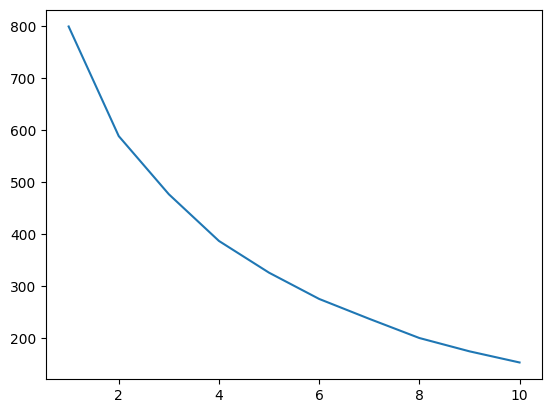

In [ ]:
intertia_scores3=[]
for i in range(1,11):
  kmeans3=KMeans(n_clusters=i)
  kmeans3.fit(dff)
  intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3)

In [ ]:
# df.to_csv("Clustering.csv") to save it as csv file
# plt.savefig("Clustering.png")  to save as an image file

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,4,0
1,Male,21,15,81,4,3
2,Female,20,16,6,4,0
3,Female,23,16,77,4,3
4,Female,31,17,40,4,0
...,...,...,...,...,...,...
195,Female,35,120,79,1,7
196,Female,45,126,28,1,5
197,Male,32,126,74,1,7
198,Male,32,137,18,1,5
